In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
values = {'island' : 'Unknown', 'bill_length_mm' : penguins['bill_length_mm'].max(), 'bill_depth_mm' : penguins['bill_depth_mm'].max(), 
          'flipper_length_mm' : penguins['flipper_length_mm'].max(), 'body_mass_g' : penguins['body_mass_g'].max(), 'sex' : 'Unknown'}
newPenguins = penguins.fillna(value=values)
newPenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,59.6,21.5,231.0,6300.0,Unknown
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<hr>

#### Pairplot

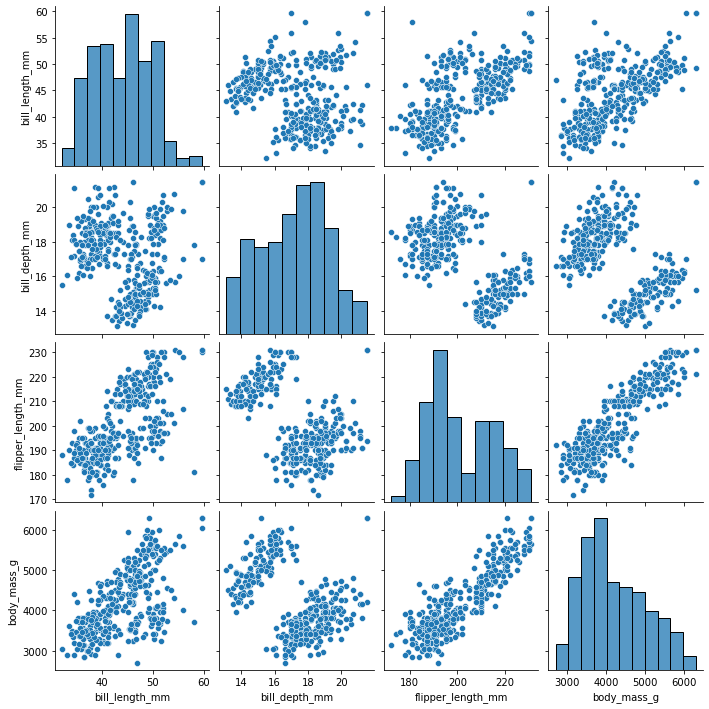

In [4]:
sns.pairplot(newPenguins)

In [5]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(newPenguins[features])

In [6]:
newPenguins['cluster'] = km.predict(newPenguins[features])

In [7]:
newPenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
3,Adelie,Torgersen,59.6,21.5,231.0,6300.0,Unknown,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0


In [8]:
newPenguins.cluster.value_counts()

0    209
1    135
Name: cluster, dtype: int64

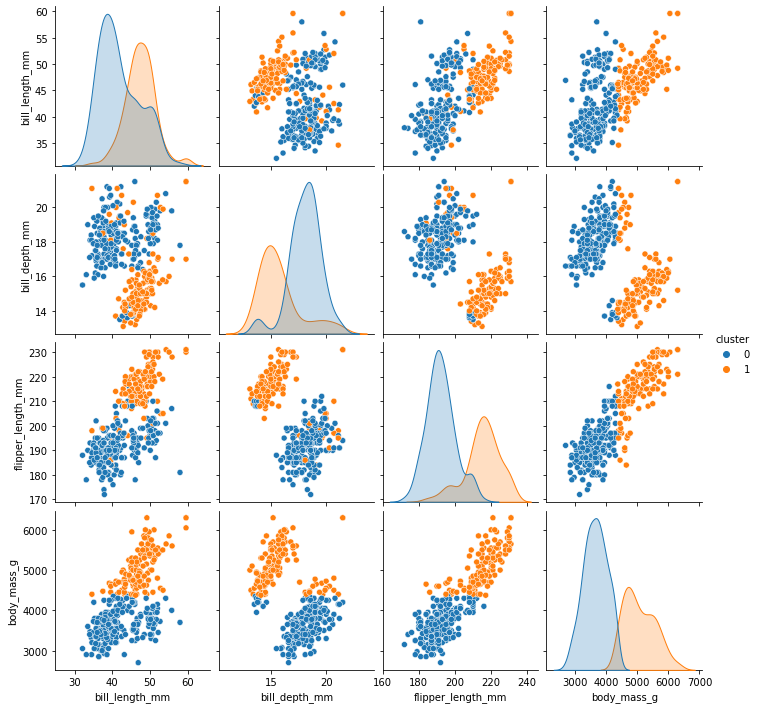

In [9]:
sns.pairplot(newPenguins, hue="cluster")

<hr>

#### Coefficent

In [10]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [11]:
metrics.silhouette_score(newPenguins[features], km.labels_, metric='euclidean')

0.6282865767004574

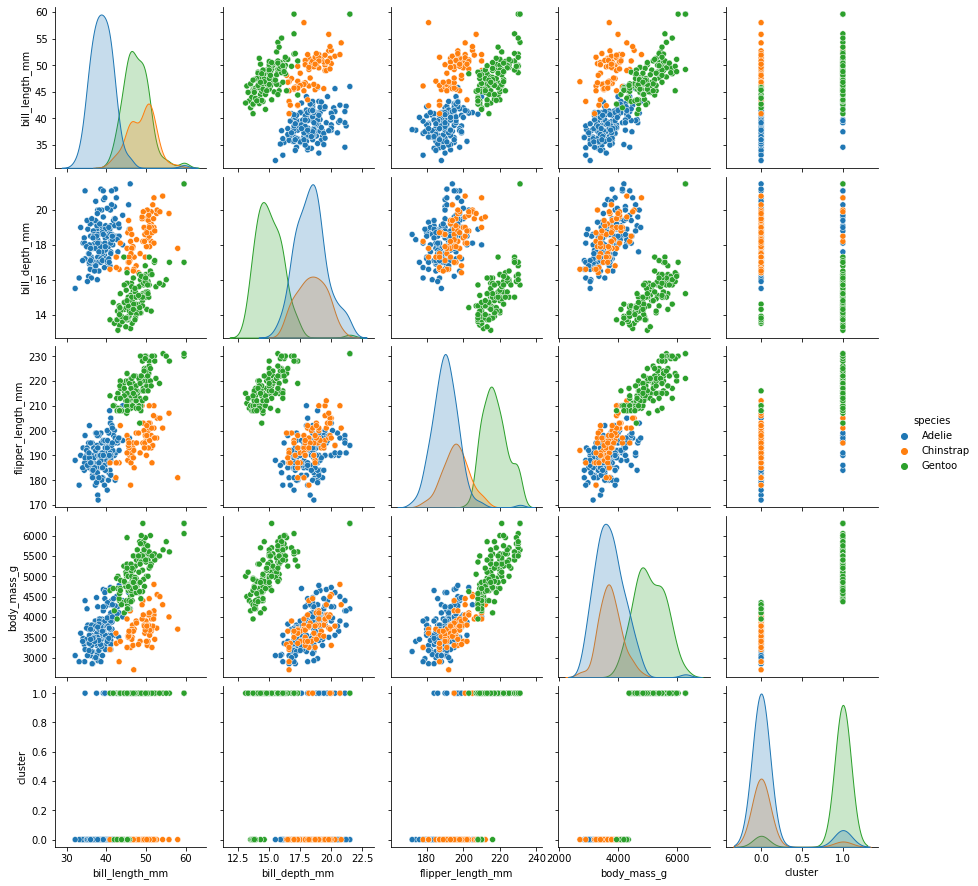

In [12]:
sns.pairplot(newPenguins, hue="species")

<br>

In [13]:
contingency_table = newPenguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,137,15
Chinstrap,63,5
Gentoo,9,115


##### Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

Er zijn species in de zelfde cluster. Eventueel kunnen dit penguins zijn met enorme rare groei. Of eventueel penguins die zich raar genoeg hebben gekruisd met andere soorten?